## Linear Regression 

Import & Data

Data Source: http://roycekimmons.com/tools/generated_data/community_health

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading CSV file 

In [97]:
df = pd.read_csv('community_health.csv')
df.head(2)

,age,gender,continent,weight,height,visits
0,47,female,Europe,247,65,28
1,26,male,Asia,283,66,23


Converting Inch to cm & LBS to kg 

In [98]:
df['weight'] = round(df['weight']*0.453592, 2)
df['weight']

0      112.04
1      128.37
2       91.17
3      107.50
4       90.26
        ...  
995    123.83
996    112.04
997    140.61
998     29.03
999     96.62
Name: weight, Length: 1000, dtype: float64

In [99]:
df['height'] = round(df['height']*2.54, 2)
df.head(2)

,age,gender,continent,weight,height,visits
0,47,female,Europe,112.04,165.10,28
1,26,male,Asia,128.37,167.64,23


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1000 non-null   int64  
 1   gender     1000 non-null   object 
 2   continent  1000 non-null   object 
 3   weight     1000 non-null   float64
 4   height     1000 non-null   float64
 5   visits     1000 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


Converting object type data to numeric type for train our module 

In [52]:
df['gender'] = df['gender'].map({
    "female": 0,
    "male": 1
})
df['gender']

0      0
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: gender, Length: 1000, dtype: int64

In [53]:
df['continent'] = df['continent'].map({
    "North America": 1,
    "South America": 2,
    "Europe": 3,
    "Asia": 4,
    "Africa": 5,
})

In [54]:
df['continent'].head(1)

0    3
Name: continent, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1000 non-null   int64  
 1   gender     1000 non-null   int64  
 2   continent  1000 non-null   int64  
 3   weight     1000 non-null   float64
 4   height     1000 non-null   float64
 5   visits     1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [56]:
df.describe()

,age,gender,continent,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,0.481000,3.198000,90.285230,170.942000,19.956000
std,14.839166,0.499889,1.160234,23.956427,15.964765,6.455055
min,0.000000,0.000000,1.000000,20.410000,116.840000,2.000000
25%,36.000000,0.000000,2.000000,74.840000,160.020000,15.000000
50%,45.000000,0.000000,3.000000,89.360000,170.180000,20.000000
75%,55.000000,1.000000,4.000000,107.050000,182.880000,24.000000
max,89.000000,1.000000,5.000000,161.480000,218.440000,40.000000


Check there is any null value in our dataset 

In [57]:
df.isnull().sum()

age          0
gender       0
continent    0
weight       0
height       0
visits       0
dtype: int64

Show the relationship in dataset 

In [58]:
df.corr()

,age,gender,continent,weight,height,visits
age,1.000000,0.023866,-0.002893,-0.084918,-0.063822,0.539543
gender,0.023866,1.000000,0.035833,0.271668,0.296193,0.066747
continent,-0.002893,0.035833,1.000000,-0.051962,0.023966,-0.064728
weight,-0.084918,0.271668,-0.051962,1.000000,0.142065,0.543139
height,-0.063822,0.296193,0.023966,0.142065,1.000000,-0.385644
visits,0.539543,0.066747,-0.064728,0.543139,-0.385644,1.000000


Create and Calculate BMI (Body Mass Index) column by using weight and height columns

In [59]:
df['BMI'] = round(df['weight'] / (df['height']/100)**2, 2)
df['BMI']

0      41.10
1      45.68
2      30.56
3      31.27
4      37.60
       ...  
995    41.51
996    30.07
997    38.75
998     8.00
999    33.36
Name: BMI, Length: 1000, dtype: float64

Save the evolved data 

In [60]:
df.to_csv('community_health_evolved.csv', index=False)

Show the relation between visits and BMI 

In [61]:
print(f'Correlation between visits and BMI is: {round(df["visits"].corr(df["BMI"]), 2)}')

Correlation between visits and BMI is: 0.72


Show the relation between BMI and visits by using Scatter Plot 

<Axes: xlabel='visits', ylabel='BMI'>

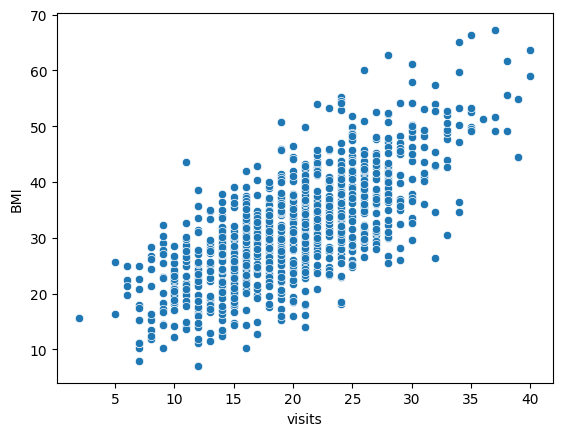

In [62]:
sns.scatterplot(data=df, x='visits', y='BMI')

Let's examine the relationships between numeric variables in the dataset.

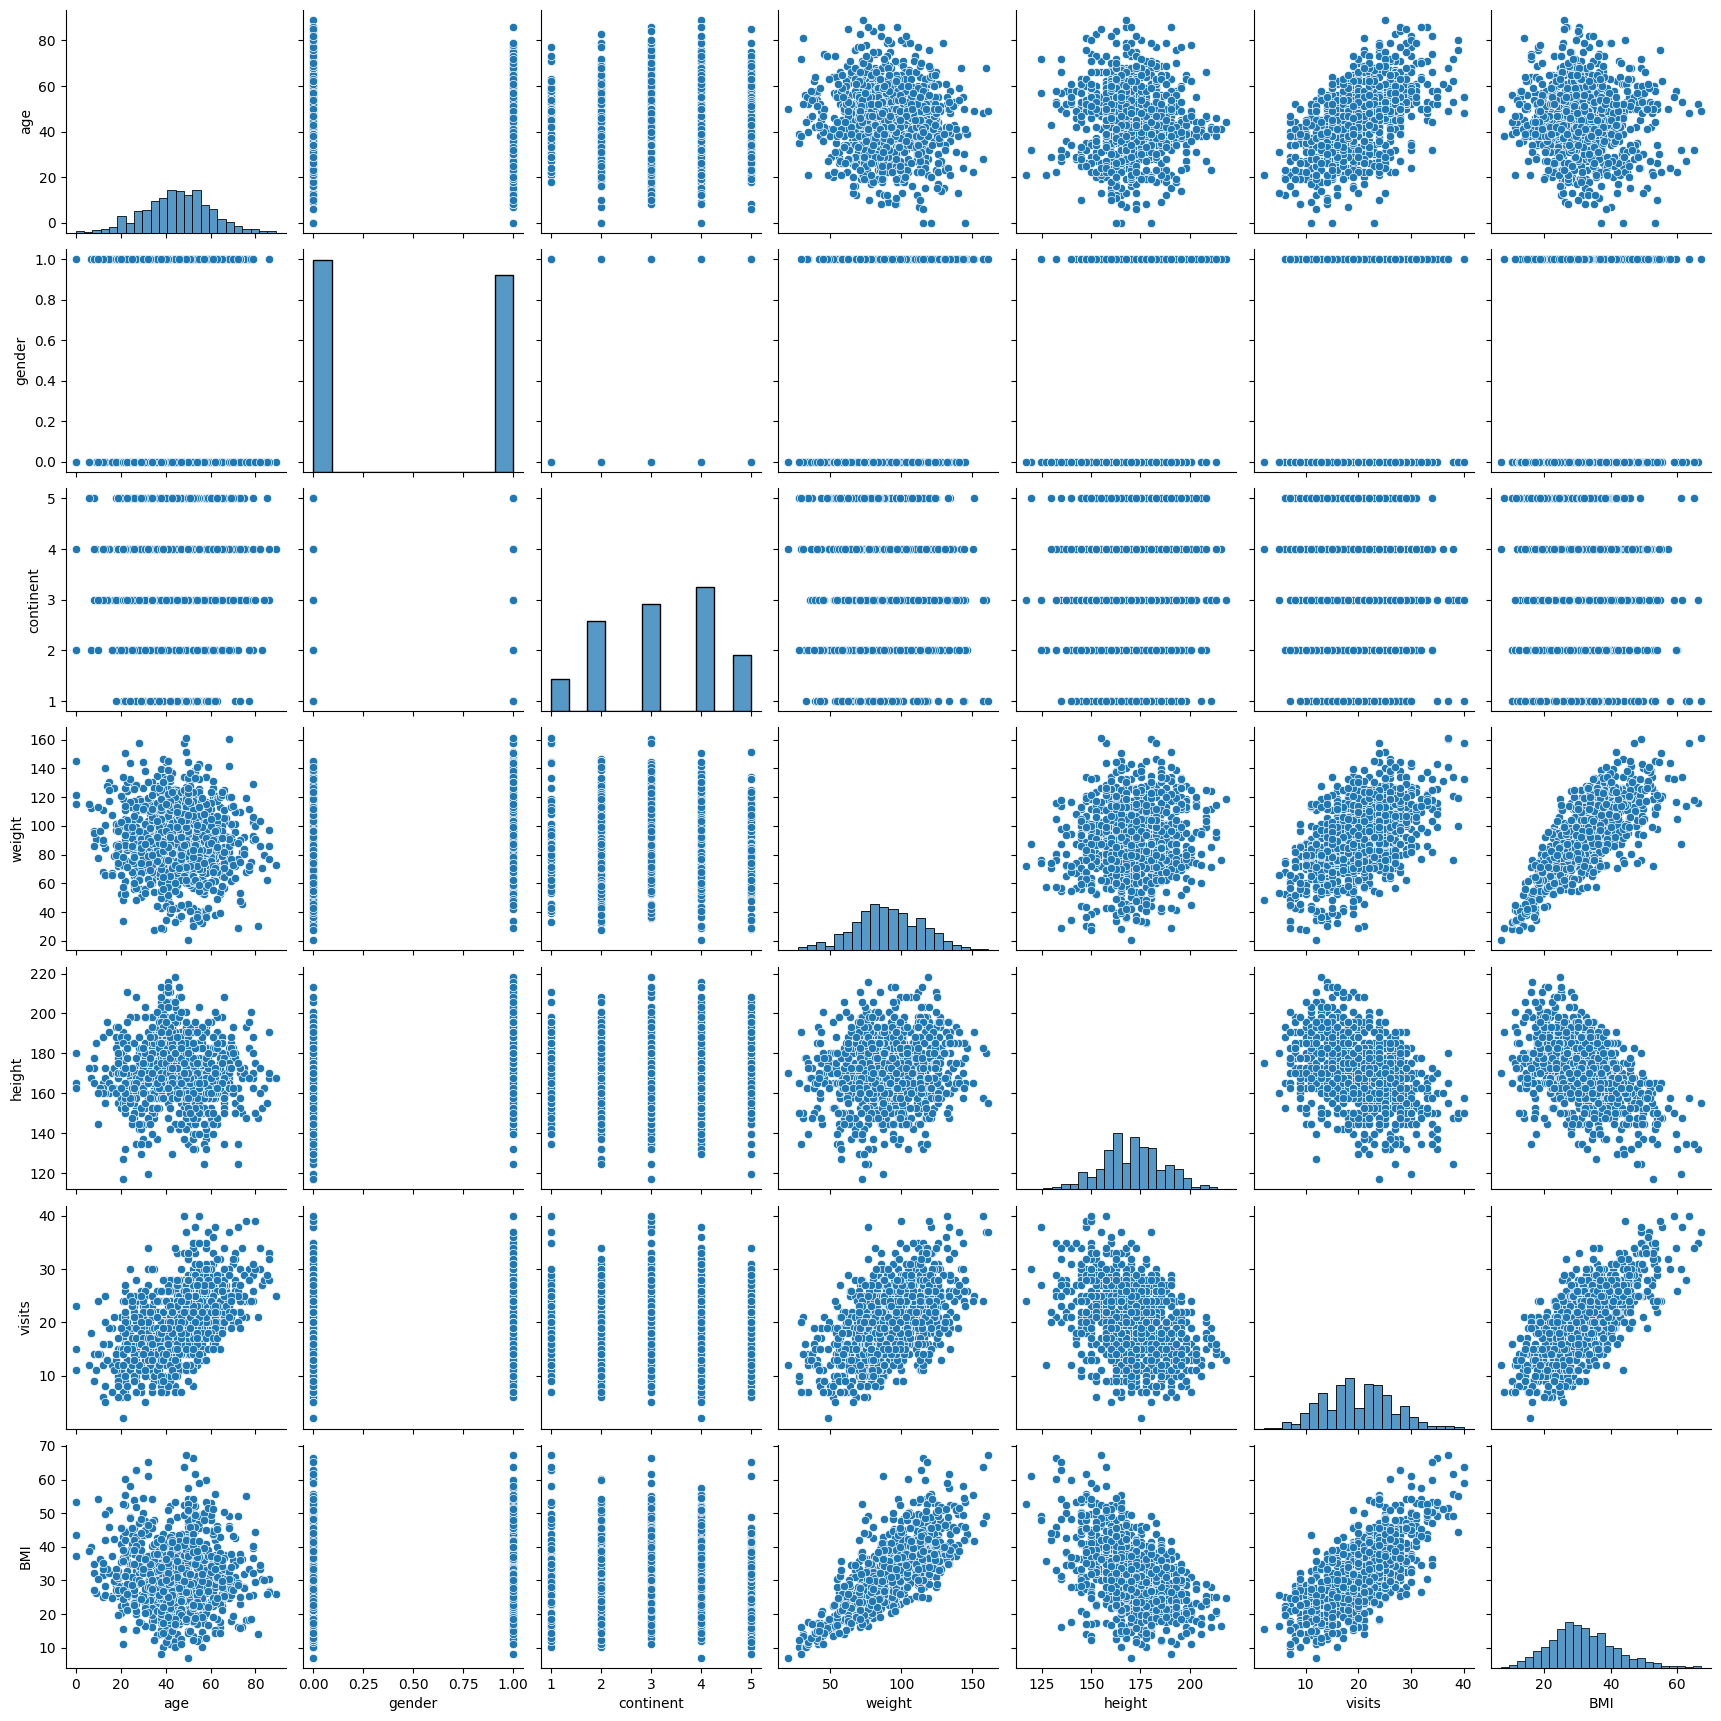

In [63]:
sns.pairplot(df)

Show the currelation of df 

In [64]:
df.corr()

,age,gender,continent,weight,height,visits,BMI
age,1.000000,0.023866,-0.002893,-0.084918,-0.063822,0.539543,-0.041803
gender,0.023866,1.000000,0.035833,0.271668,0.296193,0.066747,0.050756
continent,-0.002893,0.035833,1.000000,-0.051962,0.023966,-0.064728,-0.066022
weight,-0.084918,0.271668,-0.051962,1.000000,0.142065,0.543139,0.772210
height,-0.063822,0.296193,0.023966,0.142065,1.000000,-0.385644,-0.492776
visits,0.539543,0.066747,-0.064728,0.543139,-0.385644,1.000000,0.723564
BMI,-0.041803,0.050756,-0.066022,0.772210,-0.492776,0.723564,1.000000


Import Train Test Libraries

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Find out how many times people visit the hospital

In [66]:
X = df.drop('visits', axis=1)
y = df['visits']

In [67]:
X.shape, y.shape

((1000, 6), (1000,))

Train the model 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

Train the model with training data 

In [69]:
linear_model = LinearRegression()

In [70]:
linear_model.fit(X_train, y_train)

LinearRegression()

Save the predicted values as test_predictions

In [71]:
test_predictions = linear_model.predict(X_test)

Performance

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
print(f'Mean of the visits: {df["visits"].mean()}')
print(f'Standart deviation of the visits: {df["visits"].std()}')

Mean of the visits: 19.956
Standart deviation of the visits: 6.455054742737023


In [74]:
print(f'R^2 Score is: {round(r2_score(y_test, test_predictions), 2)}')
print(f'MAE Score is: {round(mean_absolute_error(y_test, test_predictions), 2)}')
print(f'RMSE Score is: {round(np.sqrt(mean_squared_error(y_test, test_predictions)), 2)}')

R^2 Score is: 0.86
MAE Score is: 2.09
RMSE Score is: 2.44


Try to choose best test_size for dataset 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

# Define the range of test sizes to be evaluated
start = 0
end = 1
step = 0.1

# Loop through different test sizes to evaluate the model's performance
for s in np.arange(start, end, step):

    # Skip the iteration if the test_size is 0
    if s == 0:
        continue

    # Split the data into training and testing sets with the current test_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=s, 
                                                        random_state=17)
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    test_predictions = model.predict(X_test)

    # Print the evaluation metrics for the current test_size
    print(f"For {s} test_size the results are: \n")
    print("MAE: ", round(mean_absolute_error(y_test, test_predictions), 3))
    print(f"R^2 Score: {round(r2_score(y_test, test_predictions), 3)}")
    print(f'RMSE Score is: {round(np.sqrt(mean_squared_error(y_test, test_predictions)), 3)}\n\n')


For 0.1 test_size the results are: 

MAE:  2.089
R^2 Score: 0.833
RMSE Score is: 2.426


For 0.2 test_size the results are: 

MAE:  2.094
R^2 Score: 0.855
RMSE Score is: 2.44


For 0.30000000000000004 test_size the results are: 

MAE:  2.109
R^2 Score: 0.864
RMSE Score is: 2.47


For 0.4 test_size the results are: 

MAE:  2.131
R^2 Score: 0.857
RMSE Score is: 2.496


For 0.5 test_size the results are: 

MAE:  2.143
R^2 Score: 0.857
RMSE Score is: 2.497


For 0.6000000000000001 test_size the results are: 

MAE:  2.162
R^2 Score: 0.849
RMSE Score is: 2.514


For 0.7000000000000001 test_size the results are: 

MAE:  2.175
R^2 Score: 0.844
RMSE Score is: 2.538


For 0.8 test_size the results are: 

MAE:  2.2
R^2 Score: 0.84
RMSE Score is: 2.57


For 0.9 test_size the results are: 

MAE:  2.201
R^2 Score: 0.84
RMSE Score is: 2.576




# Final 

In [76]:
final = LinearRegression()

In [77]:
final.fit(X, y)

LinearRegression()

In [78]:
y_hat = final.predict(X)

In [79]:
resiudal_values = y_hat - y 

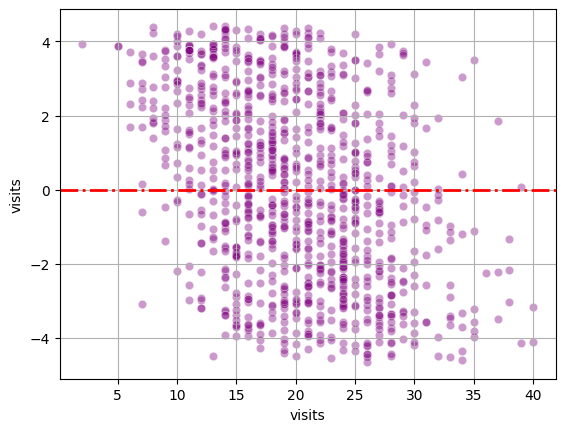

In [80]:
sns.scatterplot(x=y, y=resiudal_values,
                alpha=0.4, color='purple')
plt.axhline(y=0, color='red', ls='-.', lw=2)
plt.grid(True)

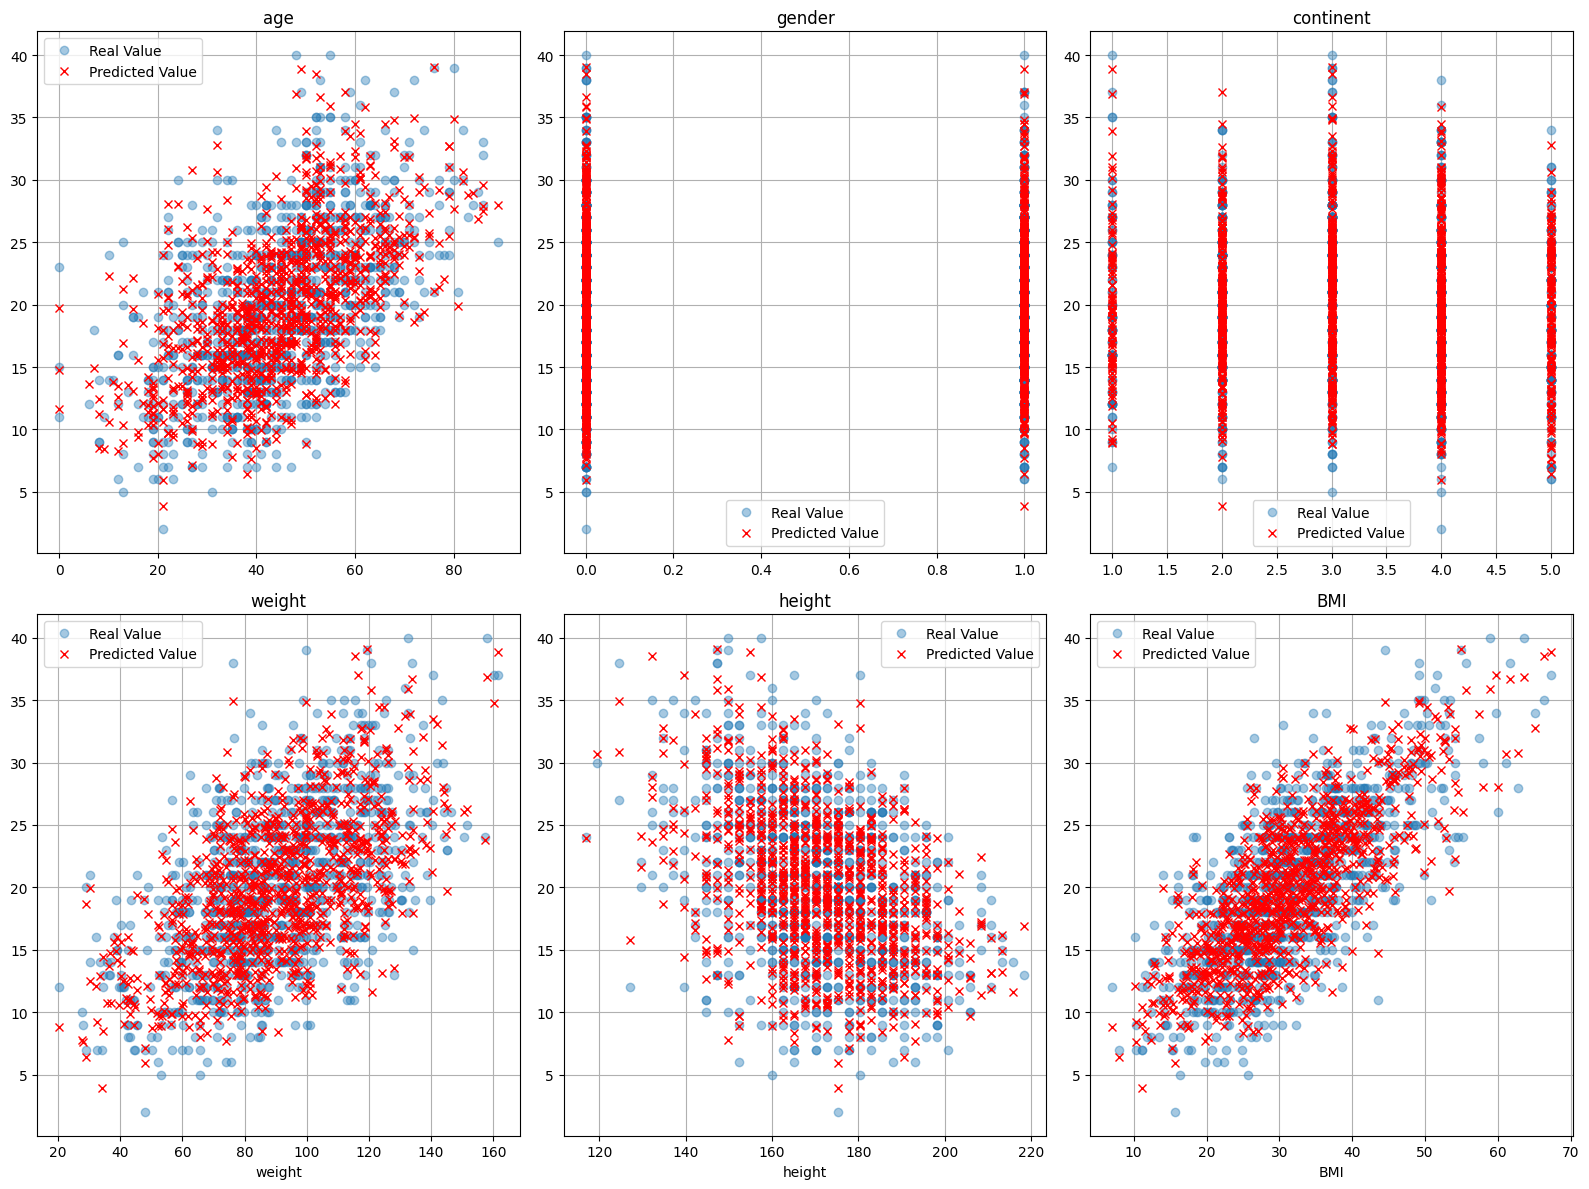

In [81]:
# Create a 2x3 grid of subplots with a specified size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# Define the features to be visualized against the predicted values
features = ['age', 'gender', 'continent', 'weight', 'height', 'BMI']

# Iterate over each feature and its corresponding index in the 'features' list
for i, feature in enumerate(features):
    # Calculate the row and column indices for the current subplot
    row_index = i // 3
    column_index = i % 3

    axes[row_index, column_index].plot(df[feature], df['visits'], 'o', alpha=0.4)
    axes[row_index, column_index].plot(df[feature], y_hat, 'x', color='red')
    axes[row_index, column_index].set_title(feature)
    axes[row_index, column_index].legend(['Real Value', 'Predicted Value'])

    # Add grid lines to improve visualization
    axes[row_index, column_index].grid(True)

    # If it's the last row, set the x-axis label as the feature name for better readability
    if row_index == 1:
        axes[row_index, column_index].set_xlabel(feature)

# Adjust the subplots to avoid overlapping labels and titles
plt.tight_layout()

Save the module

In [82]:
from joblib import dump, load

In [83]:
dump(final, "dr_visit.joblib")

['dr_visit.joblib']

Load the module 

In [84]:
load_module = load('dr_visit.joblib')

In [85]:
def welcome_page():
    print("Welcome to the predict model AI\n")
    print("Your BMI will be calculated in program")
    print('**'*35 + '\n')
    age = float(input("1- Please enter age as number"))
    gender = float(input("2- For female press 0, for male 1"))
    print("1- North America\n2- South America \n3- Europe\n4- Asia \n5- Africa \n")
    race = float(input("3- Please enter continent as number"))
    weight = float(input("4- Please enter your weight as kg: "))
    height = float(input("5- Please enter your height as cm: "))
    predict_model(age, gender,race, weight, height)

def predict_model(age, gender, race, weight, height):
    load_module = load('dr_visit.joblib')
    BMI = round(weight / (height/100)**2,2)
    predicted_time = load_module.predict([[age, gender, race, weight, height, BMI]])
    print(f"You've probably visited the hospital {round(predicted_time[0])} times.")
    print("Stay well!")

In [86]:
trying_myself = [23, 1, 4, 75, 178]
predict_model(*trying_myself)

You've probably visited the hospital 11 times.
Stay well!


c:\Users\utkua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Call the prediction function

In [87]:
welcome_page()

Welcome to the predict model AI

Your BMI will be calculated in program
**********************************************************************

1- North America
2- South America 
3- Europe
4- Asia 
5- Africa 

You've probably visited the hospital 11 times.
Stay well!


c:\Users\utkua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
X = df.drop('visits', axis=1)
y = df['visits']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [90]:
X_test, X_train, y_test, y_train = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=17)

In [91]:
module = LinearRegression()

In [92]:
module.fit(X_train, y_train)

LinearRegression()

In [93]:
test_predictions = module.predict(X_test)

In [94]:
print("MAE: ", mean_absolute_error(y_test, test_predictions))
print("R^2 Score: ", r2_score(y_test, test_predictions))

MAE:  2.215310206227257
R^2 Score:  0.835212688092047
